In [10]:
from sunpy.net import Fido, attrs as a
from stixpy.net.client import STIXClient
from sunpy.timeseries import TimeSeries
from stixpy import timeseries
import matplotlib.pyplot as plt
import sys
import matplotlib.dates as mdates
import datetime
from datetime import date, timedelta
import numpy as np
import pandas as pd
import requests
from scipy.io import readsav
from scipy.interpolate import griddata
from scipy import interpolate
import pandas as pd
import matplotlib

In [18]:
def wind_processing(start, end):
	
	# CONSTRUCTING DATETIMES
	start_year = int(start[0:4])
	start_month = int(start[5:7])
	start_day = int(start[8:10])
	end_year = int(end[0:4])
	end_month = int(end[5:7])
	end_day = int(end[8:10])
	sdate = datetime.date(start_year,start_month,start_day) 
	edate = datetime.date(end_year,end_month,end_day)

	observation_start_time = datetime.datetime(sdate.year, sdate.month, sdate.day, 0, 0)
	date_list = pd.date_range(sdate,edate - timedelta(days=1), freq='d')
	date_list_strings = []

	for i in range(0, np.size(date_list)):
		date = str(date_list[i])
		start_year_string = str(date[0:4])
		start_month_string = str(date[5:7])
		start_day_string = str(date[8:10])
		date_combined = start_year_string + start_month_string + start_day_string
		date_list_strings.append(date_combined)

	time_res = timedelta(seconds=60)
	wind_epoch = []
	wind_epoch.append(observation_start_time)
# 	for i in range(0, (24 * len(date_list_strings) * 60) - 1):
# 	    wind_epoch.append(wind_epoch[-1] + time_res)
	for i in range(0, (24 * len(date_list_strings) * 60)):
	    wind_epoch.append(wind_epoch[-1] + time_res)

	return (wind_epoch)

In [12]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [13]:
test = np.loadtxt('20210101.R1')

In [6]:
test.shape

(256, 1441)

In [14]:
freqs_rad1 = np.linspace(0.02, 1.04, 256)
freqs_rad2 = np.linspace(1.07, 13.825, 256)

freqs_rad1.shape

(256,)

In [3]:
# start_day_sample = '2021-06-29'
# end_day_sample = '2021-06-30'

start_day_sample = '2021-01-01'
end_day_sample = '2021-01-02'

times_wind = wind_processing(start_day_sample, end_day_sample)
freqs_rad1 = np.linspace(0.02, 1.04, 255)
freqs_rad2 = np.linspace(1.07, 13.825, 255)

# wind_rad1 = pd.read_csv('wind_rad1_29_06.csv', sep="\s+")
# wind_rad1 = wind_rad1.drop(['3.380e-01'], axis = 1)
# wind_rad1 = np.log10(wind_rad1)



# wind_rad2 = pd.read_csv('wind_rad_2_29_06.csv', sep="\s+")
# wind_rad2 = wind_rad2.drop(['4.900e-02'], axis = 1)
# wind_rad2 = np.log10(wind_rad2)


times_wind = wind_processing(start_day_sample, end_day_sample)
freqs_rad1 = np.linspace(0.02, 1.04, 255)
freqs_rad2 = np.linspace(1.07, 13.825, 255)


My_FIGURE = plt.figure(figsize=(6.,8.))
ax1 = plt.subplot2grid((2, 1), (0, 0))
plt.title('WIND WAVES Spectrogram')
ax1.pcolormesh(times_wind, freqs_rad1, wind_rad1,  cmap = 'viridis', vmin = np.percentile(wind_rad1, 10), vmax = np.percentile(wind_rad1, 80))
date_format = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(date_format)
ax1.axes.get_xaxis().set_visible(False)
plt.ylim(freqs_rad1.max(), freqs_rad1.min())
plt.ylabel("Frequency (MHz)")
ax1.set_xlim([datetime.datetime(2021, 6, 29, 11, 40, 0), datetime.datetime(2021, 6, 29, 12, 30, 0)])
ax1.get_yaxis().set_label_coords(-0.06,0.5)


ax2 = plt.subplot2grid((2, 1), (1, 0))
ax2.pcolormesh(times_wind, freqs_rad2, wind_rad2,  cmap = 'viridis', vmin = np.percentile(wind_rad1, 10), vmax = np.percentile(wind_rad1, 80))
date_format = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(date_format)
plt.ylim(freqs_rad2.max(), freqs_rad2.min())
ax2.set_xlim([datetime.datetime(2021, 6, 29, 11, 40, 0), datetime.datetime(2021, 6, 29, 12, 30, 0)])
ax2.get_yaxis().set_label_coords(-0.06,0.5)
plt.ylabel("Frequency (MHz)")
plt.xlabel("Time (UT)")
My_FIGURE.tight_layout()
My_FIGURE.subplots_adjust(hspace=0)  

FileNotFoundError: [Errno 2] No such file or directory: 'wind_rad1_29_06.csv'

/var/folders/nh/6r_l73vn5p1cbcbs3y1lp8j80000gn/T/ipykernel_30209/516288328.py:23: RuntimeWarning: divide by zero encountered in log10
  data_set = np.log10(test)
/var/folders/nh/6r_l73vn5p1cbcbs3y1lp8j80000gn/T/ipykernel_30209/516288328.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(times_wind, freqs_rad1, data_set,  cmap = 'viridis', vmin = np.percentile(data_set, 10), vmax = np.percentile(data_set, 80))


Text(0, 0.5, 'Frequency (MHz)')

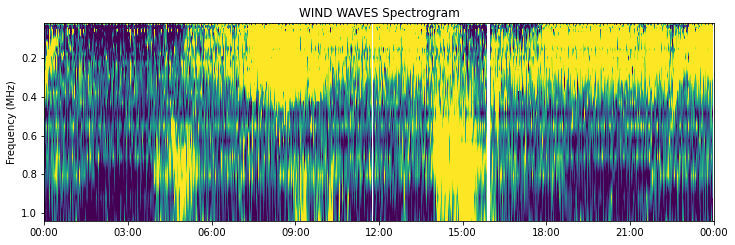

In [23]:
start_day_sample = '2021-01-01'
end_day_sample = '2021-01-02'

# times_wind = wind_processing(start_day_sample, end_day_sample)
# freqs_rad1 = np.linspace(0.02, 1.04, 255)
# freqs_rad2 = np.linspace(1.07, 13.825, 255)

# wind_rad1 = pd.read_csv('wind_rad1_29_06.csv', sep="\s+")
# wind_rad1 = wind_rad1.drop(['3.380e-01'], axis = 1)
# wind_rad1 = np.log10(wind_rad1)



# wind_rad2 = pd.read_csv('wind_rad_2_29_06.csv', sep="\s+")
# wind_rad2 = wind_rad2.drop(['4.900e-02'], axis = 1)
# wind_rad2 = np.log10(wind_rad2)


times_wind = wind_processing(start_day_sample, end_day_sample)
freqs_rad1 = np.linspace(0.02, 1.04, 256)
freqs_rad2 = np.linspace(1.07, 13.825, 256)

data_set = np.log10(test)



My_FIGURE = plt.figure(figsize=(12.,8.))
ax1 = plt.subplot2grid((2, 1), (0, 0))
plt.title('WIND WAVES Spectrogram')
ax1.pcolormesh(times_wind, freqs_rad1, data_set,  cmap = 'viridis', vmin = np.percentile(data_set, 10), vmax = np.percentile(data_set, 80))
date_format = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(date_format)
#ax1.axes.get_xaxis().set_visible(False)
plt.ylim(freqs_rad1.max(), freqs_rad1.min())
plt.ylabel("Frequency (MHz)")
#ax1.set_xlim([datetime.datetime(2021, 6, 29, 11, 40, 0), datetime.datetime(2021, 6, 29, 12, 30, 0)])
#ax1.get_yaxis().set_label_coords(-0.06,0.5)